<h1><center>Model 3: Balanced Bagging Classifier - Decision Tree Performance</center></h1>

This notebook will look into the performance of the model on the training dataset, inorder to find where and how to improve on future models.

## Import Libraries

In [7]:
import sys
sys.path.append("C:\Project\playground-series-s3e5\src")

from target_mapping import *
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

## Import Dataset

In [8]:
train = pd.read_csv("../data/feature_engineered_data/train.csv")
train.head()

,quality,trans_citric_acid,pca1,pca2,pca3,pca4,pca5
0,6,0.574595,-1.424641,0.084614,0.139190,0.017038,-0.001012
1,6,2.806711,-2.059772,-0.036339,-0.764453,0.231441,0.001443
2,7,-0.991746,-0.807816,0.064889,1.641203,-0.016858,0.000201
3,5,-0.227777,0.309183,-0.098466,-0.682202,-0.339941,0.000703
4,6,0.235509,0.751813,0.421726,-0.053477,0.160119,-0.002452


In [19]:
X, y = train.loc[:, train.columns != "quality"], train["quality"]

## Import Model

In [12]:
model = joblib.load("../models/model3.pkl")
model

BalancedBaggingClassifier(estimator=DecisionTreeClassifier(), random_state=19)

## Analysis

In [23]:
y_pred = model.predict(X)
y_pred = pd.DataFrame(y_pred, columns=["quality"])
y_pred = encoding_to_target(y_pred.quality)
y_true = y

In [24]:
matrix = confusion_matrix(y_true, y_pred, labels=[3, 4, 5, 6, 7, 8])
matrix = pd.DataFrame(matrix, columns=[3, 4, 5, 6, 7, 8], index=[3, 4, 5, 6, 7, 8])

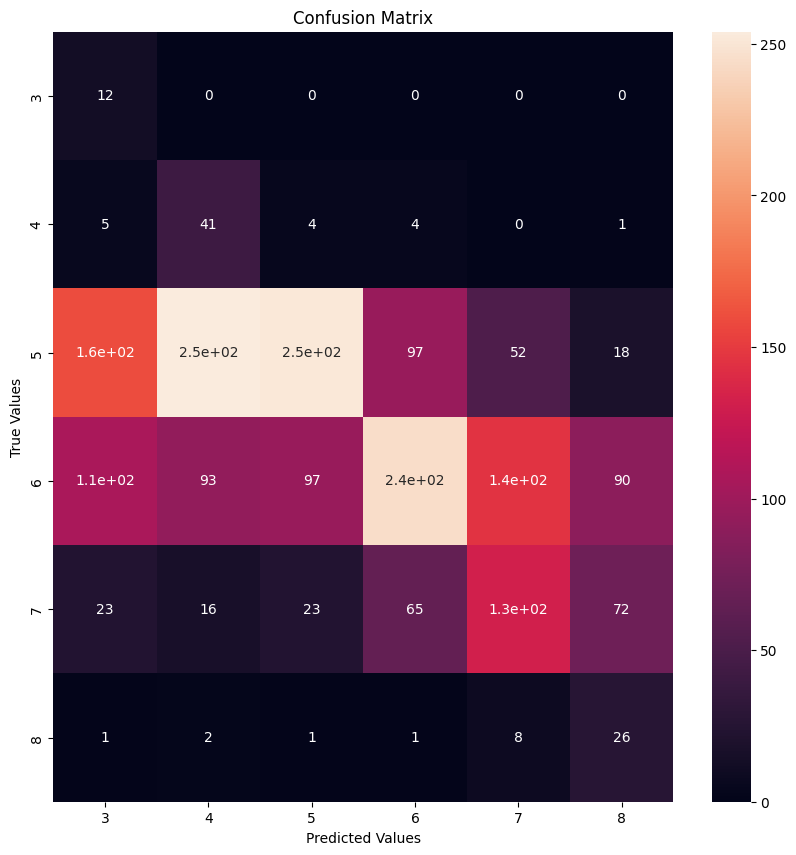

In [25]:
plt.figure(figsize=(10,10))
sns.heatmap(matrix, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

Performing Balanced Bagging Classifier instead of making synthetic samples using SMOTE has shown to perform better in classifying correctly.